# Population_Data_Visualisation

In [9]:
## Importing important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=30)
matplotlib.rcParams.update({'font.size': 28})
import math
import datetime as dt
import os
import sys

## Utility Functions

In [10]:

## Visulalization function 
def Visualize(dataset,List_of_count_to_print,title1,ylab,vx=50,vy=30,w=.80):
    df = dataset
    n = 0
    for i in List_of_count_to_print:
        filter1 = df['Country'] == i
        df = df[filter1]
        labels = df['Date']
        conf = df['Confirmed']
        Recov = df['Recovered']
        Death = df['Deaths']
        
        #high = max(conf)
        #low = min(conf)
        
        x = np.arange(len(labels))  # the x label locations 
        width = w  # the width of the bars
        fig, ax = plt.subplots(figsize=(vx,vy))
        rects1 = ax.bar(x - width, conf, width, label='confirmed')
        rects2 = ax.bar(x , Recov, width, label='Recovered')
        rects3 = ax.bar(x + width , Death, width, label='Death')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(ylab)
        ax.set_title(title1)
        ax.set_xticks(x)
        plt.xticks(rotation=90) 
        #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
        ax.set_xticklabels(labels)
        ax.legend()
        n  = n + 1
    
    
    plt.show()
    
## function to Check the List of Countries avaialable
def count_avalaible(dataframe,country_coul_rep = 'Country'):
    x = 0
    for i in set(dataframe.loc[:,country_coul_rep]):
        print(i,end=' | ')
        x = x + 1
        if(x > 6):
            x = 0
            print()
    print("\n\n##Total No of Countries = " + str(len(set(dataframe.loc[:,country_coul_rep]))))
    
    

## Loading Population_Data Data

In [11]:
Population_Data_Countires_Wise = pd.read_csv('../../Population_Data/WPP2019_PopulationBySingleAgeSex_1950-2019.csv')
Population_Data_Countires_Wise

,LocID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,4,Afghanistan,2,Medium,1950,1950.5,0,0,1,139.669,154.913,294.582
1,4,Afghanistan,2,Medium,1950,1950.5,1,1,1,131.916,141.851,273.767
2,4,Afghanistan,2,Medium,1950,1950.5,2,2,1,125.127,130.632,255.759
3,4,Afghanistan,2,Medium,1950,1950.5,3,3,1,119.220,121.097,240.317
4,4,Afghanistan,2,Medium,1950,1950.5,4,4,1,114.112,113.085,227.197
...,...,...,...,...,...,...,...,...,...,...,...,...
3132005,716,Zimbabwe,2,Medium,2019,2019.5,96,96,1,0.019,0.120,0.139
3132006,716,Zimbabwe,2,Medium,2019,2019.5,97,97,1,0.013,0.083,0.096
3132007,716,Zimbabwe,2,Medium,2019,2019.5,98,98,1,0.006,0.043,0.049
3132008,716,Zimbabwe,2,Medium,2019,2019.5,99,99,1,0.002,0.015,0.017


In [12]:
## Check the List of Countries avaialable
##
full_pop_data = Population_Data_Countires_Wise
##

## Columns renaming for Uniformity
Population_Data_Countires_Wise = Population_Data_Countires_Wise.rename(columns={'Location': 'Country'})
count_avalaible(Population_Data_Countires_Wise,'Country')

Suriname | UNICEF Regions: East Asia and Pacific | WB region: Middle East and North Africa (excluding high income) | Kazakhstan | Greater Arab Free Trade Area (GAFTA) | Romania | Commonwealth of Nations | 
Southern Common Market (MERCOSUR) | UNICEF Programme Regions: West and Central Africa (WCARO) | Lebanon | ESCAP: lower middle HDI | Europe and Northern America | Italy | Tajikistan | 
UNICEF Regions: Latin America and Caribbean | Tonga | ESCAP: upper middle HDI | Central America | New EU member states (joined since 2004) | Somalia | Bahamas | 
Rwanda | Costa Rica | Eurasian Economic Community (Eurasec) | Channel Islands | ESCWA: Gulf Cooperation Council countries | Slovenia | UNICEF Regions: Western Europe | 
African Group | ESCAP: low HDI | Economic Community of Central African States (ECCAS) | United Kingdom (and dependencies) | Lower-middle-income countries | ESCAP: high HDI | Kyrgyzstan | 
More developed: Europe | Eastern European Group | ESCWA: member countries | Northern Africa

Commonwealth: Europe | African Union: Western Africa | Benin | UNICEF Programme Regions: East Asia and Pacific (EAPRO) | WHO: African region (AFRO) | Asia-Pacific Economic Cooperation (APEC) | 

##Total No of Countries = 440


In [13]:
## Analysing the data Structure
Country_to_look_for = 'India'
Year_to_look_for = 2019
ylab = "Population"
xlab = "Year"



filter1 = Population_Data_Countires_Wise['Country'] == Country_to_look_for
Population_Data_Countires_Wise_country_specific = Population_Data_Countires_Wise[filter1]
filter2 = Population_Data_Countires_Wise_country_specific['Time'] == Year_to_look_for
Population_Data_Countires_Wise_country_specific = Population_Data_Countires_Wise_country_specific[filter2]
Population_Data_Countires_Wise_country_specific
#Population_Data_Countires_Wise  ## Uncomment this to view for all countires at once

,LocID,Country,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
1420969,356,India,2,Medium,2019,2019.5,0,0,1,12518.937,11385.787,23904.724
1420970,356,India,2,Medium,2019,2019.5,1,1,1,12303.679,11187.267,23490.946
1420971,356,India,2,Medium,2019,2019.5,2,2,1,12179.091,11070.664,23249.755
1420972,356,India,2,Medium,2019,2019.5,3,3,1,12133.716,11025.350,23159.066
1420973,356,India,2,Medium,2019,2019.5,4,4,1,12049.429,10927.902,22977.331
...,...,...,...,...,...,...,...,...,...,...,...,...
1421065,356,India,2,Medium,2019,2019.5,96,96,1,27.444,37.908,65.352
1421066,356,India,2,Medium,2019,2019.5,97,97,1,20.203,28.635,48.838
1421067,356,India,2,Medium,2019,2019.5,98,98,1,12.618,19.099,31.717
1421068,356,India,2,Medium,2019,2019.5,99,99,1,7.794,12.509,20.303


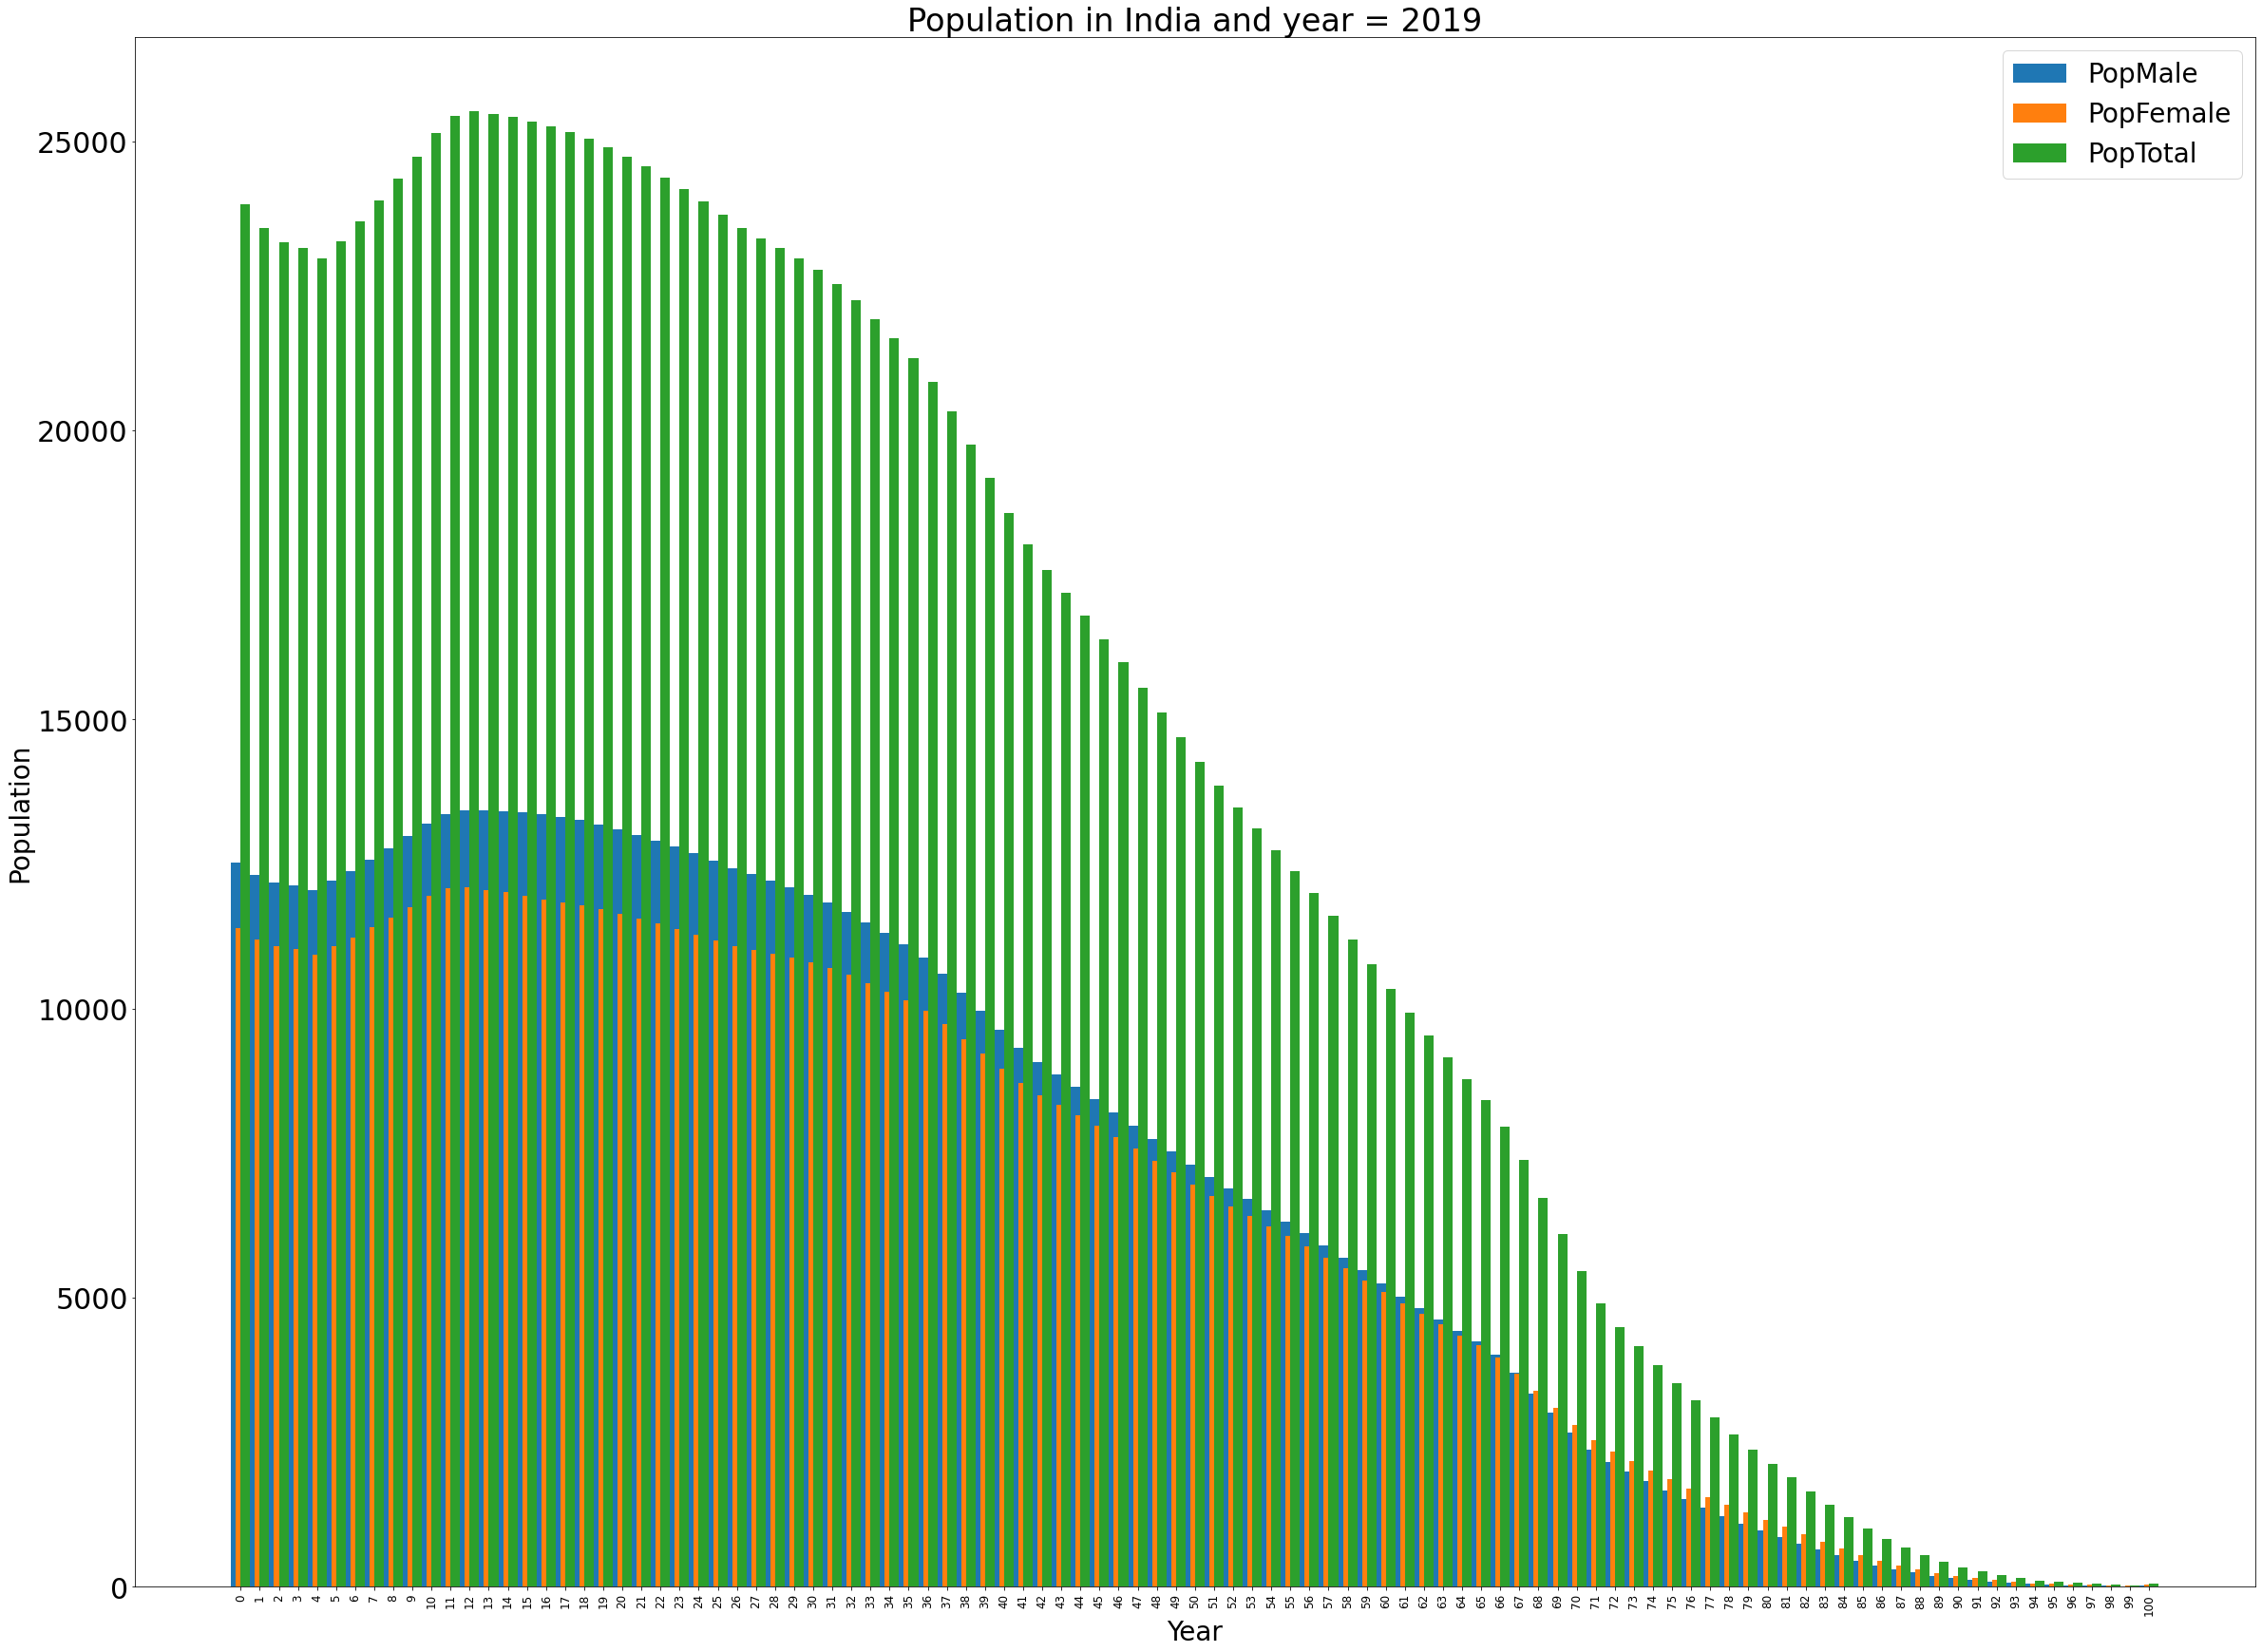

In [14]:
## Visualisation

df = Population_Data_Countires_Wise_country_specific
            

labels = df['AgeGrp']
prev_PopMale = df['PopMale']
prev_PopFemale = df['PopFemale']
prev_PopTotal = df['PopTotal']
        
title1 = 'Population in ' + str(Country_to_look_for) + ' and year = ' + str(Year_to_look_for)
         
#high = int(max(prev_2018))
#low = 0  

x = np.arange(len(labels))  # the x label locations 
width = .50  # the width of the bars
fig, ax = plt.subplots(figsize=(40,30))
rects1 = ax.bar(x-width/2, prev_PopMale, width, label='PopMale')
rects2 = ax.bar(x, prev_PopFemale, width, label='PopFemale')
rects3 = ax.bar(x+width/2, prev_PopTotal, width, label='PopTotal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
#ax.set_yticks(y)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

    
    
plt.show()

## Cleaning Population DATA(Preprocessing)

##  Writing the cleaned data in Cleaned Folder

In [17]:
Population_Data_Countires_Wise.to_csv('../Pre_Processed_Data/Population_Data_Countires_Wise_Processed.csv')

## Visualisation After Cleaning 

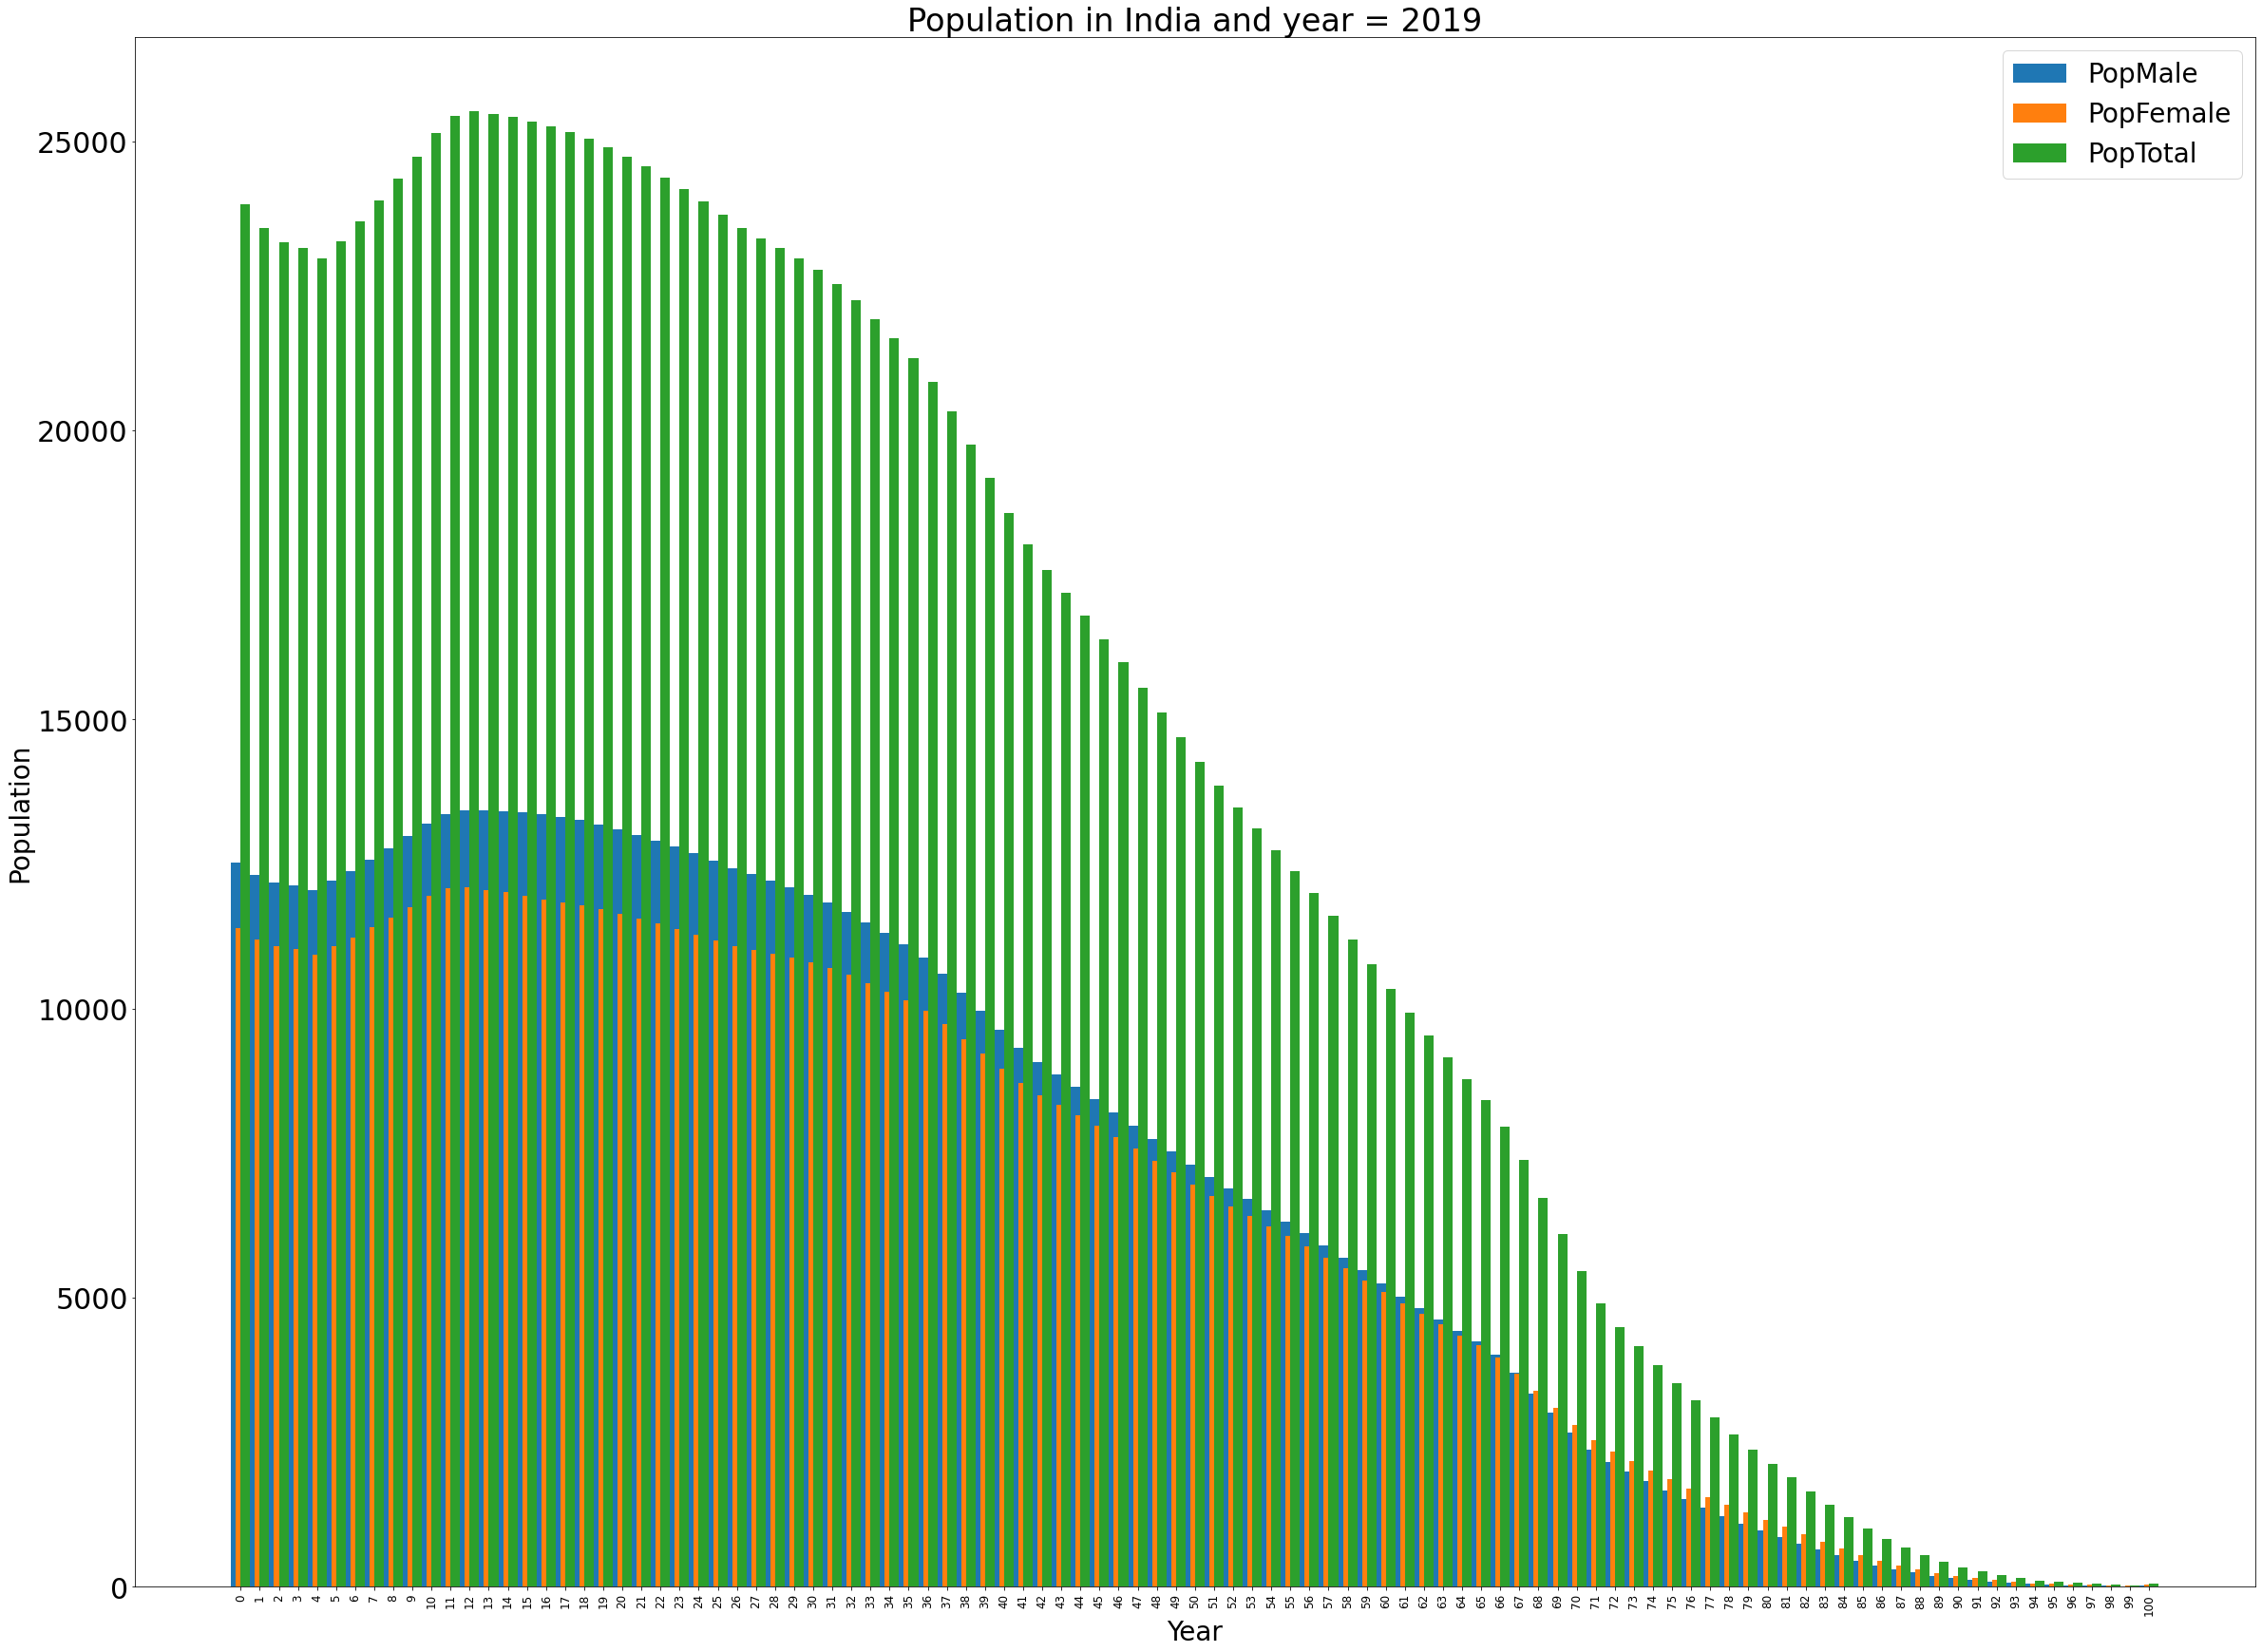

In [16]:
## Visualisation

df = Population_Data_Countires_Wise_country_specific
            

labels = df['AgeGrp']
prev_PopMale = df['PopMale']
prev_PopFemale = df['PopFemale']
prev_PopTotal = df['PopTotal']
        
title1 = 'Population in ' + str(Country_to_look_for) + ' and year = ' + str(Year_to_look_for)
         
#high = int(max(prev_2018))
#low = 0  

x = np.arange(len(labels))  # the x label locations 
width = .50  # the width of the bars
fig, ax = plt.subplots(figsize=(40,30))
rects1 = ax.bar(x-width/2, prev_PopMale, width, label='PopMale')
rects2 = ax.bar(x, prev_PopFemale, width, label='PopFemale')
rects3 = ax.bar(x+width/2, prev_PopTotal, width, label='PopTotal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
#ax.set_yticks(y)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

    
    
plt.show()